## Desvendando o São Paulo com GeoPandas: Uma Jornada Georeferenciada
Neste notebook, embarcaremos em uma empolgante aventura explorando dados do IBGE 2010 munidos do poder do georreferenciamento. Juntos, desvendaremos como essa ferramenta poderosa nos permite navegar pelas informações de forma espacial, abrindo um novo mundo de insights e compreensões.

In [ ]:
# Bibliotecas recomendadas
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

#ajuste no pandas para mostrar todas as colunas
pd.set_option('display.max.columns',None)
#Colocando um fundo com demarcações nos gráficos feitos no seaborn
sns.set_theme(style="whitegrid")
# Caso ache necessário, pode-se utilizar bibliotecas como
# scikitlearn e scipy para enriquecer sua análise


# Dados espaciais da cidade de São Paulo
Junto com esse notebook estão 4 arquivos georreferenciados em formato [parquet](https://en.wikipedia.org/wiki/Apache_Parquet) com informações do censo de 2010 da cidade de São Paulo.
 - `tb_district.parquet` - Agrupa informações em distritos;
 - `tb_neighborhood.parquet` - Agrupa informações em bairros;
 - `tb_area_of_ponderation.parquet` - Agrupa informações em "Áreas de Ponderação" As áreas de ponderação são a menor unidade geográfica com possibilidade de obter representatividade estatística a partir das amostras dos Censos Demográficos. São definidas pela equipe do IBGE.


## Alimentação dos dados

Carregando os arquivos nas suas respectivas variáveis

In [ ]:
df_district = gpd.read_parquet('/content/drive/MyDrive/2023/emp/geo/dados/Untitled folder/tb_district.parquet')
df_neighborhood = gpd.read_parquet('/content/drive/MyDrive/2023/emp/geo/dados/Untitled folder/tb_neighborhood.parquet')
df_ponderation = gpd.read_parquet('/content/drive/MyDrive/2023/emp/geo/dados/Untitled folder/tb_area_of_ponderation.parquet')

Imprimindo as primeiras 5 observações do dataframe que contém as informações de cada distrito

In [ ]:
# Faça sua análise aqui
print(df_district.shape)
df_district.head()

(96, 121)


,district,district_alphabetized_population,district_area_in_hectares,district_average_age_household_leaders,district_average_age_women_household_leaders,district_average_household_income,district_average_income_household_leaders,district_average_income_women_household_leaders,district_average_ipvs_factor_1,district_average_ipvs_factor_1_rural,district_average_ipvs_factor_2,district_average_ipvs_factor_2_rural,district_average_monthly_income,district_average_number_children,district_average_per_capita_income,district_average_permanent_private_households_with_10_or_more_residents,district_average_permanent_private_households_with_1_resident,district_average_permanent_private_households_with_2_residents,district_average_permanent_private_households_with_3_residents,district_average_permanent_private_households_with_4_residents,district_average_permanent_private_households_with_5_residents,district_average_permanent_private_households_with_6_residents,district_average_permanent_private_households_with_7_residents,district_average_permanent_private_households_with_8_residents,district_average_permanent_private_households_with_9_residents,district_average_permanent_private_households_with_electricity,district_average_permanent_private_households_without_exclusive_use_bathroom_residents,district_average_permanent_private_houses_fully_owned,district_average_permanent_private_houses_in_acquisition,district_average_permanent_private_properties_fully_owned,district_average_permanent_private_properties_in_acquisition,district_average_permanent_private_properties_rented,district_average_permanent_private_rented_properties,district_average_population_density,district_average_prop_households_access_water,district_average_proportion_households_electricity,district_average_proportion_households_no_income,district_average_proportion_households_one_halft_sm_income,district_average_proportion_households_sanitation,district_average_proportion_households_trash_collection,district_average_proportion_households_two_or_more_income,district_average_proportion_households_two_sm_income,district_average_proportion_househols_one_eigth_sm_income,district_average_proportion_income_participation_in_household_responsible,district_average_proportion_literate_people,district_average_proportion_literate_women,district_average_proportion_population_up_to_5_years_age,district_average_proportion_private_households_one_half_sm_income,district_average_proportion_private_households_one_quarter_sm_income,district_average_proportion_responsible_people_up_to_30_years,district_average_proportion_women_up_to_30_years,district_average_residents_in_permanent_households,district_average_residents_per_household,district_avg_ipvs_group,district_households,district_improvised_households,district_literacy_rate,district_max_ipvs_group,district_min_ipvs_group,district_n_regions_high_social_vulnerability,district_n_regions_low_social_vulnerability,district_n_regions_medium_social_vulnerability,district_number_house_workers,district_number_subnormal_aglomerates,district_permanent_housholds,district_permanent_private_households_with_10_or_more_residents,district_permanent_private_households_with_1_resident,district_permanent_private_households_with_2_residents,district_permanent_private_households_with_3_residents,district_permanent_private_households_with_4_residents,district_permanent_private_households_with_5_residents,district_permanent_private_households_with_6_residents,district_permanent_private_households_with_7_residents,district_permanent_private_households_with_8_residents,district_permanent_private_households_with_9_residents,district_permanent_private_households_with_electricity,district_permanent_private_households_with_up_to_3_bathrooms,district_permanent_private_households_without_exclusive_use_bathroom_residents,district_permanent_private_houses_fully_owned,district_permanent_private_houses_in_acquisition,district_permanent_private_properties_fully_owned,district_perma

## Explorando algumas distribuições

Verificando a **média** e **desvio padrão** das colunas `ponderation_area_population`, `ponderation_area_average_per_capita_income`, `ponderation_area_literacy_rate` e `ponderation_area_average_lot_square_meter_value` do dataframe `df_ponderation`, e observando  o **histograma** de cada uma dessas variáveis para checar sua distribuição.

In [ ]:
# Faça sua análise aqui

In [ ]:
#Função que irá juntar o histograma com o seu boxplot associado
#Linha vertical escura nos gráficos é a para demarcar a posição da média
def histogram_boxplot(feature, figsize=(12,4)):
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,
                                    sharex=True,
                                    gridspec_kw={'height_ratios':(.25,.75)},
                                    figsize=figsize)

    sns.histplot(feature,ax=ax_hist,kde=True)
    sns.boxplot(x=feature,ax=ax_box)
    plt.vlines(feature.mean(),0,40,color='black')
    plt.title("Média:{:,} | Desvio Padrão:{:,}".format(
        round(feature.mean(),4),
        round(feature.std(),4)))

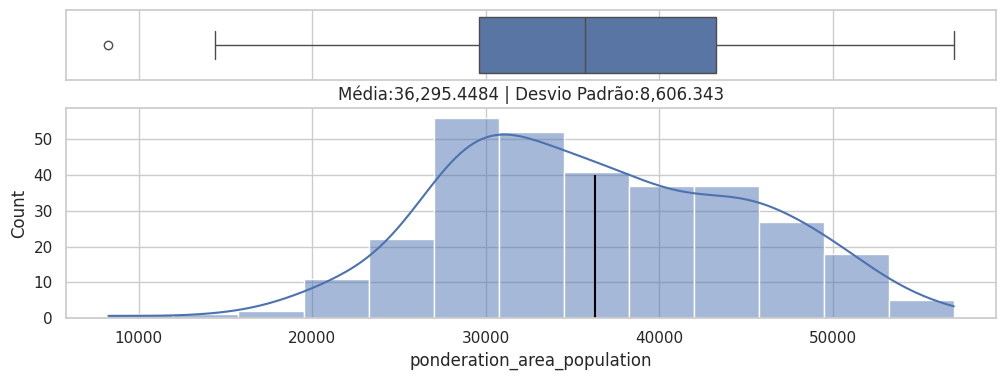

In [ ]:
histogram_boxplot(df_ponderation['ponderation_area_population'])

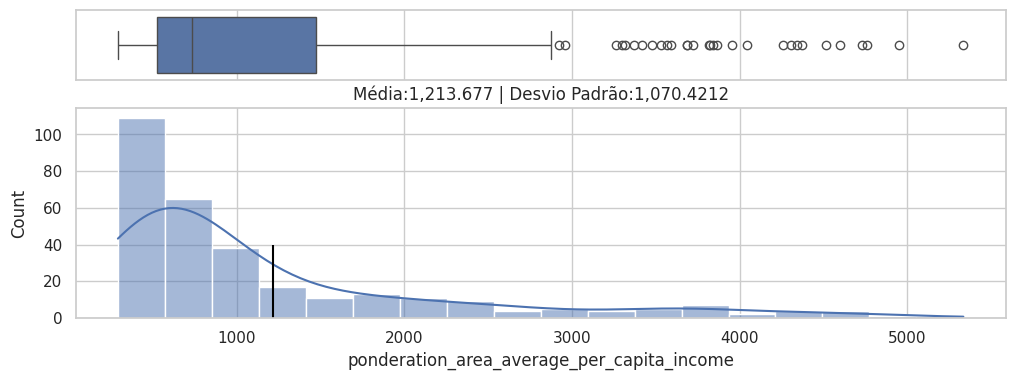

In [ ]:
histogram_boxplot(df_ponderation['ponderation_area_average_per_capita_income'])

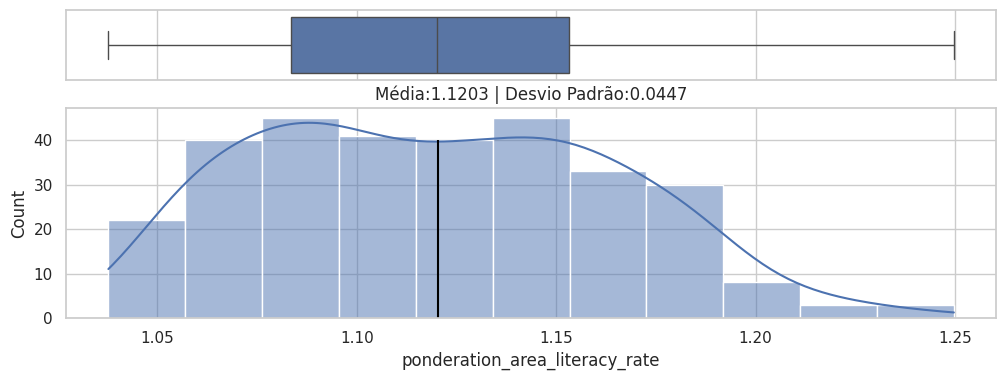

In [ ]:
histogram_boxplot(df_ponderation['ponderation_area_literacy_rate'])

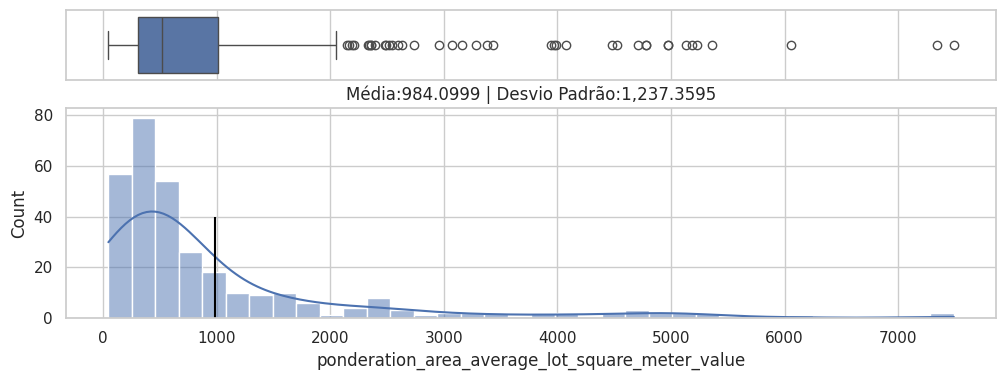

In [ ]:
histogram_boxplot(df_ponderation['ponderation_area_average_lot_square_meter_value'])

## Analisando as colunas geograficamente

A maior vantagem de um GeoDataFrame é a de que ele possuí informações geográficas juntas de suas informações descritivas. Utilizando o dataframe `df_ponderation` e o método [`.plot()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html) do GeoPandas,
podemos verificar um gráfico que mostra a distribuição geográfica de cada coluna

In [ ]:
# Faça sua análise aqui

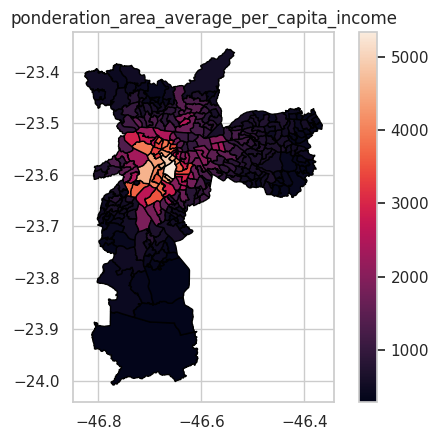

In [ ]:
#Maiores rendas se encontram no centro da cidade
df_ponderation.plot(column='ponderation_area_average_per_capita_income',
                    facecolor='white',
                    edgecolor='black',legend=True)
plt.title('ponderation_area_average_per_capita_income');

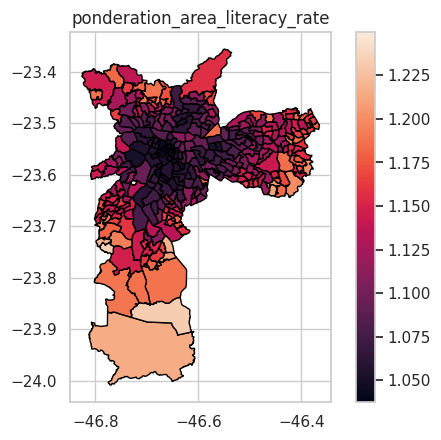

In [ ]:
#Taxa de alfabetização baixa nos centros e maior nas periferias
df_ponderation.plot(column='ponderation_area_literacy_rate',
                    facecolor='white',
                    edgecolor='black',legend=True)
plt.title('ponderation_area_literacy_rate');

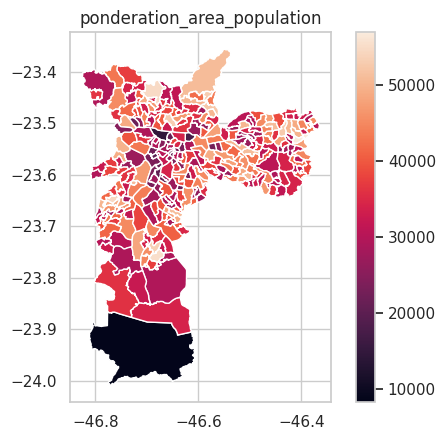

In [ ]:
#Áreas menos populosas possuem maiores taxas de alfabetização
df_ponderation.plot(column='ponderation_area_population',
                    legend=True);
plt.title('ponderation_area_population');

Agora cheque qual é o nome dos **bairros** com maior e menor `average_lot_square_meter_value`. Faça um gráfico que identifique essas regiões.

Verificando os bairros com maior e menor preço de

In [ ]:
# Faça sua análise aqui

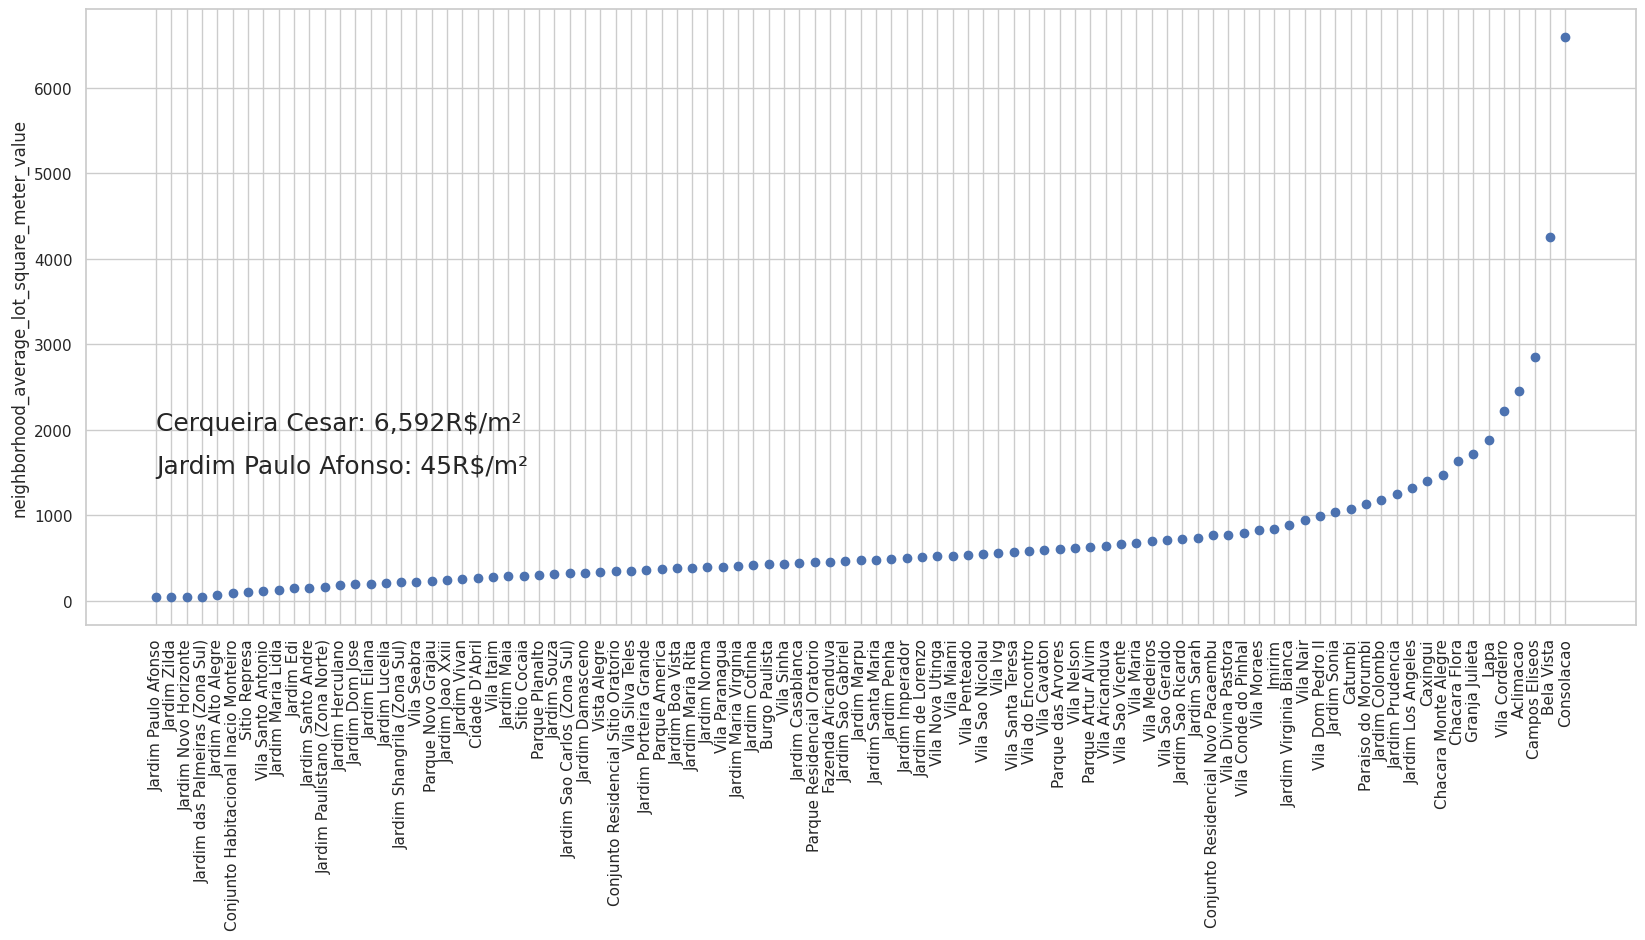

In [ ]:
#Selecionando as colunas que vão informar o preço do metro quadrado de acordo
#com os distritos e organizando o dataframe para que os valores do metro
#quadrado fique do menor para o maior
z = df_neighborhood[['neighborhood_name',
  'neighborhood_average_lot_square_meter_value']].dropna().sort_values(
      by='neighborhood_average_lot_square_meter_value')[::13]

plt.figure(figsize=(20,8))
plt.scatter(x=z['neighborhood_name'],y=z['neighborhood_average_lot_square_meter_value'])
plt.xticks(rotation='vertical');
plt.text(0,2000,'Cerqueira Cesar: {:,}R$/m²'.format(
                    round(z['neighborhood_average_lot_square_meter_value'].max()),0),
                    fontsize=18)
plt.text(0,1500,'Jardim Paulo Afonso: {:,}R$/m²'.format(
                    round(z['neighborhood_average_lot_square_meter_value'].min()),0),
                    fontsize=18)
plt.ylabel('neighborhood_average_lot_square_meter_value');

Agora analise qual é o **distrito** com maior número de parques na cidade (coluna `n_parks`). Depois verifique todos os **bairros** que estão dentro desse distrito. Faça um gráfico que mostre a localização desses bairros.


In [ ]:
# Faça sua análise aqui

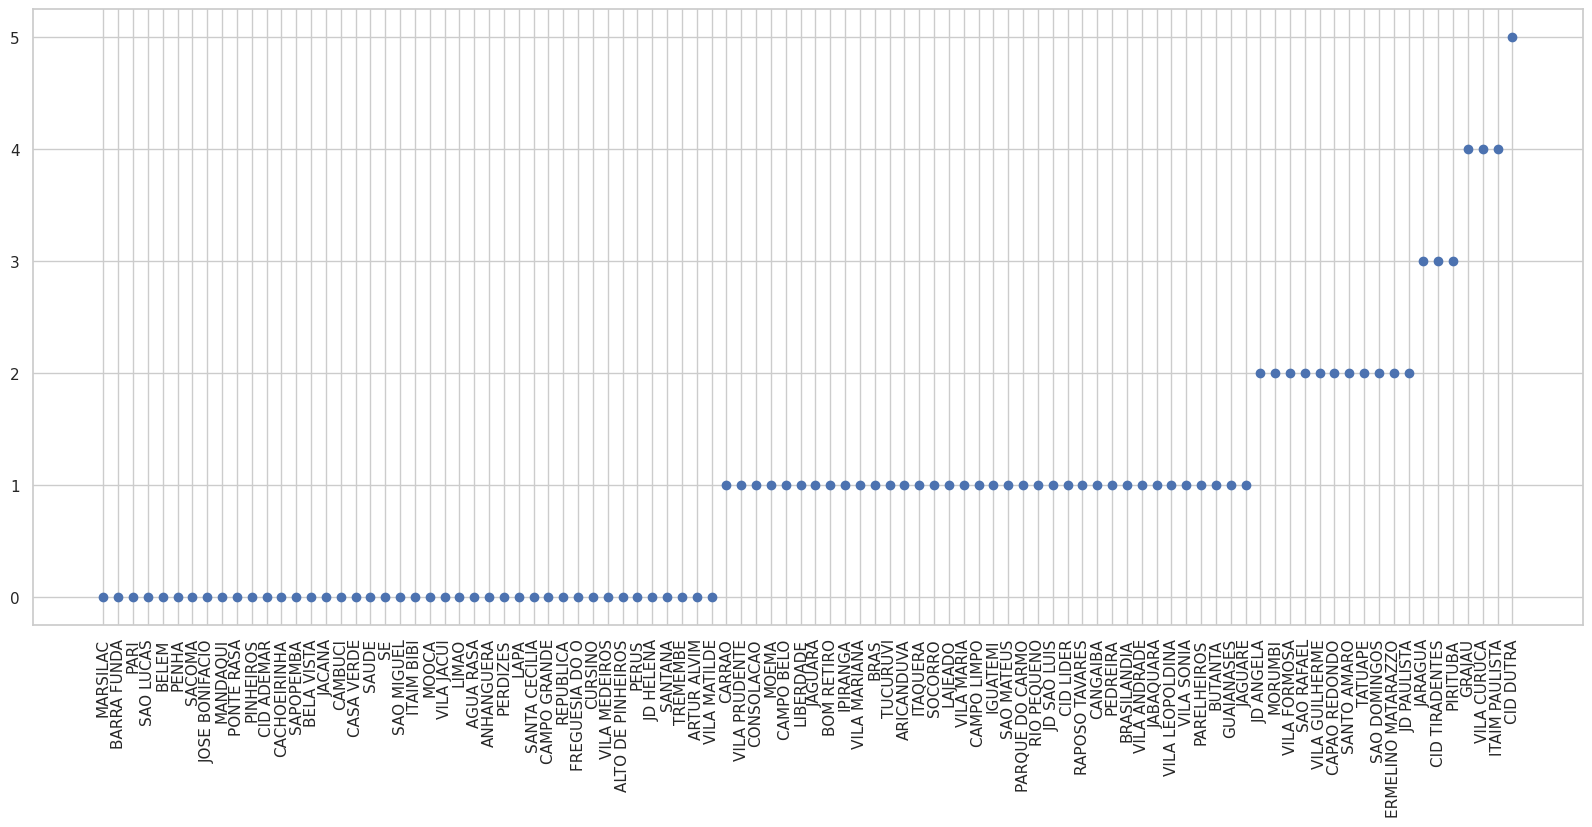

In [ ]:
#Selecionando os distritos e a quantidade de parque em cada um.
#Dataframe foi organizado em relação ao número de parques.
z = df_district[['district','district_n_parks']].sort_values(
    by='district_n_parks'
)
plt.figure(figsize=(20,8))
plt.scatter(x=z['district'],y=z['district_n_parks'])
plt.xticks(rotation='vertical');

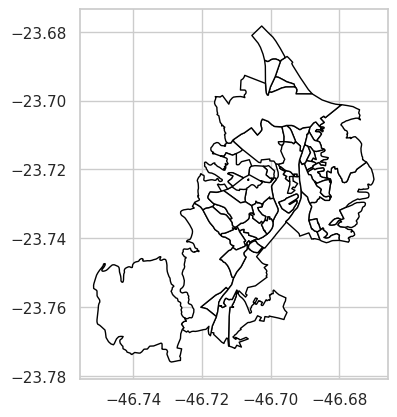

In [ ]:
#Fazendo um join entre o df_neighborhood e o df_district utilizando como
#argumento o que eles possuem em comum nas coordenadas espaciais
z = df_neighborhood.sjoin(df_district,how="inner", predicate='intersects')

#acessando as informações sobre a cidade dutra que possui a maior quantidade
#de parques.
z[z['district']=='CID DUTRA'].plot(facecolor='white',edgecolor='black');

In [ ]:
#Todos os bairros encontrado no distrito de Cidade Dutra
z[z['district']=='CID DUTRA'][['neighborhood_name']]

,neighborhood_name
68,Vila Natal
83,Jardim Rosalina
96,Parque Alto do Rio Bonito
102,Jardim Sao Rafael
103,Parque do Castelo
158,Vila da Paz
172,Jordanopolis
197,Jardim Iporanga
207,Jardim Beatriz
225,Parque America


Existe alguma **correlação** entre as variáveis de renda média per capita e preço médio do metro quadrado? Cheque sua hipótese com uma regressão e apresente os resultados. É possível encontrar outras correlações?

In [ ]:
# Faça sua análise aqui

In [ ]:
#Analisando as colunas que possuem NA values
for i in df_ponderation.columns:
  if df_ponderation[i].isna().sum()>0:
    print(i,':',df_ponderation[i].isna().sum())

ponderation_area_average_ipvs_factor_1_rural : 310
ponderation_area_average_ipvs_factor_2_rural : 310


**Normalização(standard scaler)**
$Z = \frac{X-\bar{x} \,}{\sigma}$

* Z : dado normalizado
* $\bar{x}$ média da coluna onde se aplica a transformação
* $\sigma$ desvio padrão da coluna

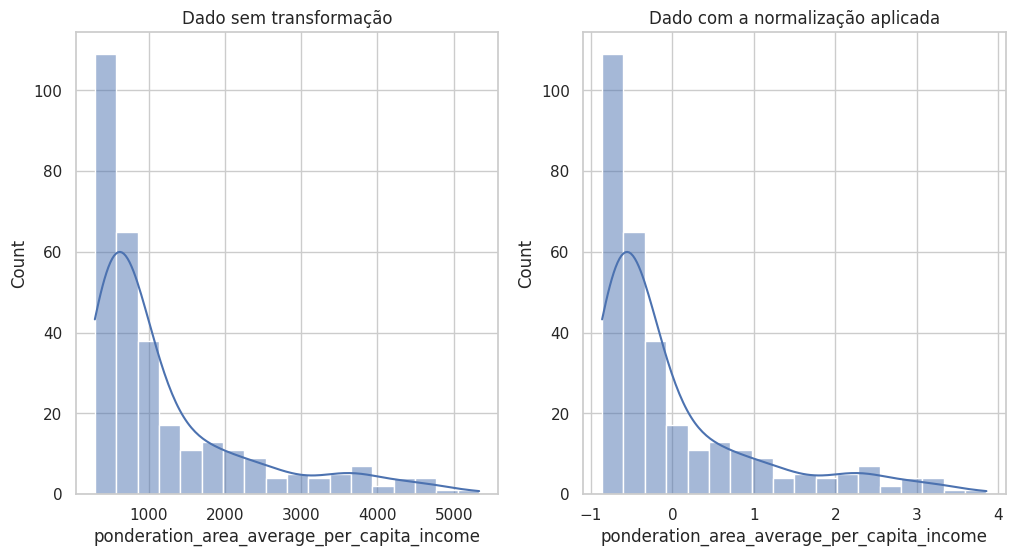

In [ ]:
#preprocessing data
scaler = StandardScaler()
#dataframe teste que vai receber df_ponderation
z = pd.DataFrame(data=df_ponderation.drop(columns=[
    'ponderation_area_average_ipvs_factor_1_rural',
    'ponderation_area_average_ipvs_factor_2_rural',
    'geometry',
    'ponderation_area_average_lot_square_meter_value']))
#obtendo os desvios padrões e médias de cada coluna para a aplicação da normalização
scaler.fit(z)
#z_norm recebe os dados normalizados
z_norm = scaler.transform(z)
#montando o dataframe com os dados normalizados
z = pd.DataFrame(data=z_norm,columns = z.columns)

#mostrando com gráficos como a transformação preserva a distribuição dos dados
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df_ponderation['ponderation_area_average_per_capita_income'],
             kde=True)
plt.title('Dado sem transformação')
plt.subplot(1,2,2)
sns.histplot(z['ponderation_area_average_per_capita_income'],
             kde=True)
plt.title('Dado com a normalização aplicada');

In [ ]:
#X recebe todas as colunas menos o target
X = z
#y é o target
y = df_ponderation['ponderation_area_average_lot_square_meter_value']
#dataframe treino com 80% do tamanho do df original e o teste com 20%
X_train,X_test,y_train,y_test = train_test_split(X,y,
                                                 test_size=0.2,
                                                 random_state=0)
#apenas verificando o tamanho de cada dataframe
print('X_train size:{} | X_teste size:{}'.format(X_train.shape,X_test.shape))
print('y_train size:{} | y_test size:{}'.format(y_train.shape,y_test.shape))

X_train size:(248, 117) | X_teste size:(62, 117)
y_train size:(248,) | y_test size:(62,)


**Modelo de regressão linear:**
$y = w_{0}* x_{0}+w_{1}* x_{1}+....+b$
* **$w_{0,1,2,...n}$ : pesos (correlações)**
* $x_{0,1,2...,n}$ : **vetores contendo os valore das células de cada coluna**
* b : **Valor de intersecção com o eixo do target**

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.558e+06, tolerance: 4.055e+04
  model = cd_fast.enet_coordinate_descent(


train: 143.03
test: 195.91


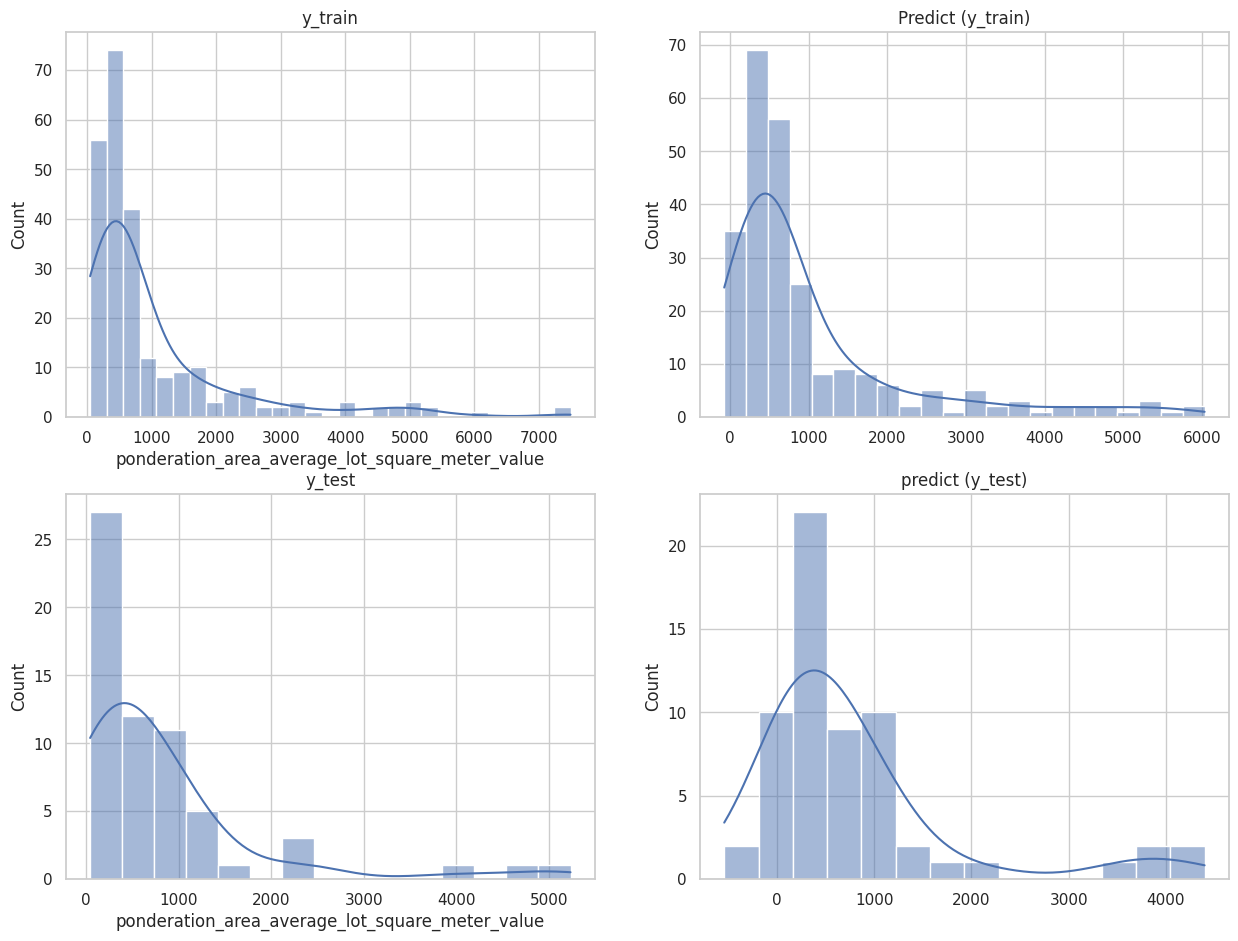

In [ ]:
#preparando os dados para a aplicação do algoritmo
model = Lasso().fit(X_train,y_train)

#Colocando as figuras nos seus respectivos quadrantes
plt.figure(figsize=(15,11))
plt.subplot(2,2,1)
sns.histplot(data=y_train,kde=True)
plt.title('y_train')
plt.subplot(2,2,2)
sns.histplot(data=model.predict(X_train),kde=True)
plt.title('Predict (y_train)')
plt.subplot(2,2,3)
sns.histplot(data=y_test,kde=True)
plt.title('y_test')
plt.subplot(2,2,4)
sns.histplot(data=model.predict(X_test),kde=True)
plt.title('predict (y_test)')

#Aplicando a função do MAE do scikit learn para ver a média de diferença entre
#os valores da previsão e dos dataframe de treino e test.
print('train:',round(mean_absolute_error(model.predict(X_train), y_train),2))
print('test:',round(mean_absolute_error(model.predict(X_test), y_test),2))

In [ ]:
#Dataframe com o valor do pesos atribuido pelo algoritmo
zz = pd.DataFrame(data=abs(model.coef_),
                  index=X_train.columns,
                  columns=['Correlação_w'])
#loop para retirar as colunas que possuem peso nulo
for i in zz.index:
  if zz.loc[i][0]==0:
    zz = zz.drop(index=i)
#ordeanando o dataframe do maior para o menor
zz = zz.sort_values(by='Correlação_w',ascending=False)
print("Quantidade de features usadas:",zz.shape[0])
zz

Quantidade de features usadas: 69


,Correlação_w
ponderation_area_average_ipvs_factor_1,1246.467277
ponderation_area_average_household_income,1240.090804
ponderation_area_average_number_floors,648.110977
ponderation_area_average_income_women_household_leaders,473.000123
ponderation_area_average_age_women_household_leaders,401.276996
...,...
ponderation_area_average_proportion_households_trash_collection,5.009586
ponderation_area_permanent_private_households_with_9_residents,3.499930
ponderation_area_min_ipvs_group,0.873593
ponderation_area_average_area_occupied,0.598467


In [ ]:
#correlação solicitada no enunciado
zz.loc['ponderation_area_average_per_capita_income']

Correlação_w    10.496345
Name: ponderation_area_average_per_capita_income, dtype: float64

In [ ]:
#outra forma de obter como a váriavel aletória(target) se relaciona com as
#outras váriaveis aleatórias (features). É usando o 'mutual information regressor'

#target : ponderation_area_average_lot_square_meter_value
X = df_ponderation.drop(columns=[
    'ponderation_area_average_ipvs_factor_1_rural',
    'ponderation_area_average_ipvs_factor_2_rural',
    'ponderation_area_average_lot_square_meter_value',
    'geometry']
                        )
#Mutual_info_regression devolve um array com os valores de "mutual information"
#de cada coluna.
MI = mutual_info_regression(
          X,
          y = df_ponderation['ponderation_area_average_lot_square_meter_value']
              )

#dataframe com os dados dos "mutual information" de cada coluna e sendo os
#indices os nomes das colunas
z = pd.DataFrame(data=MI,index=X.columns,columns=['Mutual_Information'])
z = z.sort_values(ascending = False,by='Mutual_Information')
z.head(11)

,Mutual_Information
score_ponderation_area_average_lot_square_meter_value,3.154061
score_ponderation_area_average_construction_square_meter_value,1.322097
ponderation_area_average_construction_square_meter_value,1.312290
ponderation_area_average_proportion_private_households_one_half_sm_income,1.031425
ponderation_area_average_proportion_households_one_halft_sm_income,1.023140
ponderation_area_average_proportion_households_two_or_more_income,0.960217
score_ponderation_area_average_per_capita_income,0.958619
ponderation_area_average_residents_per_household,0.956850
ponderation_area_average_residents_in_permanent_households,0.940825
ponderation_area_average_number_floors,0.916629


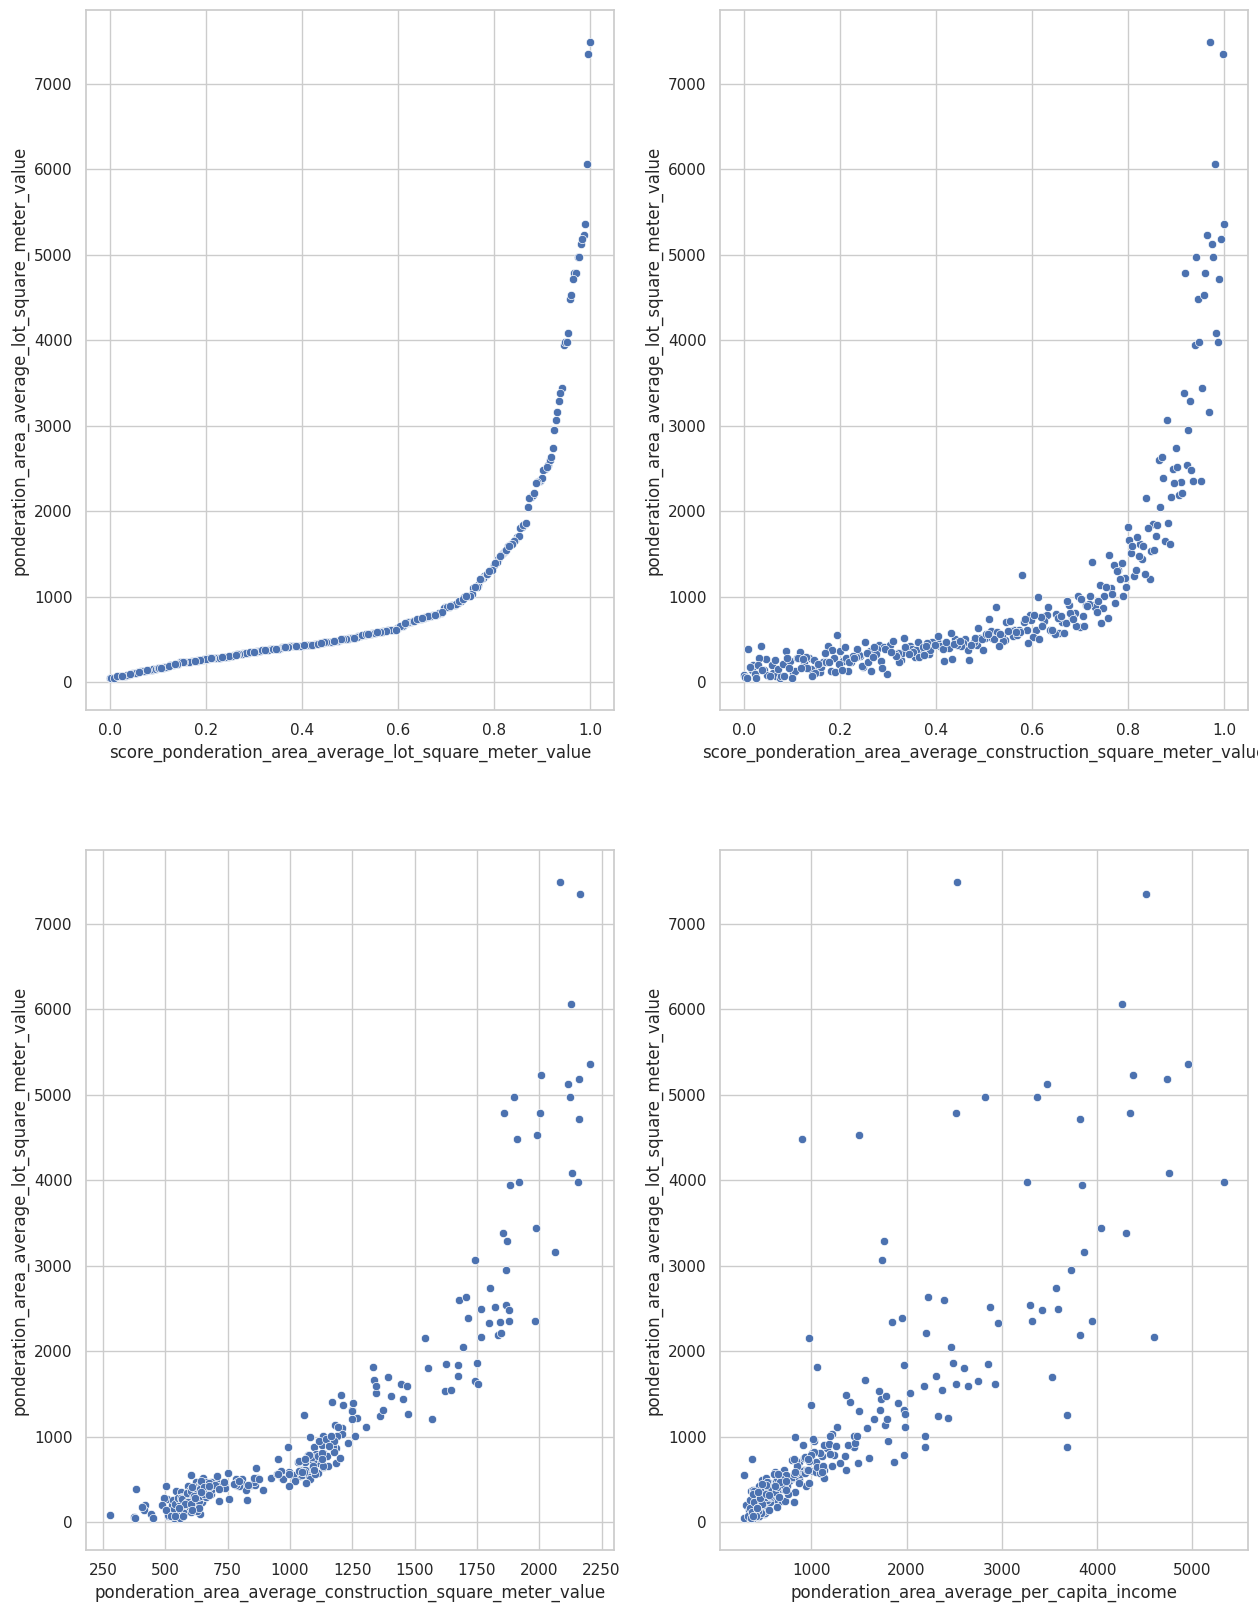

In [ ]:
#4 Scatter plots com as 3 melhores coluna com valor de MI com o target
#e a última coluna sendo 'ponderation_area_average_per_capita_income'
#sendo a coluna solicitada no enunciado
plt.figure(figsize=(15,20))
lista = ['score_ponderation_area_average_lot_square_meter_value',
         'score_ponderation_area_average_construction_square_meter_value',
         'ponderation_area_average_construction_square_meter_value',
         'ponderation_area_average_per_capita_income']
for i,j in enumerate(lista):
  plt.subplot(2,2,i+1)
  sns.scatterplot(x=df_ponderation[j],
            y=df_ponderation['ponderation_area_average_lot_square_meter_value']
                )

## Transformação de coordenadas

Abaixo definimos as coordenadas de 4 campi da USP na capital em formato UTM. Esse formato é comumente utilizado por cartógrafos por dividir o planeta em regiões e utilizar coordenadas, é geralmente mais preciso do que o de latitude e longitude. Porém, para os modelos de aprendizado de máquina e manipulação de dataframes, é mais fácil utilizar as coordenadas em lat/lon. Complete a função abaixo que deve transformar um ponto em coordenadas UTM em lat/lon.

Dica: Utilize a classe `Proj` da biblioteca `pyproj`.


In [ ]:
from pyproj import Proj # Para auxiliar na transformação
from shapely.geometry import Point # Estrutura de ponto usada no GeoPandas

In [ ]:
usp_butantan = Point((324172, 7393128))
usp_leste = Point((346758, 7402285))
triangulo_saude = Point((329620, 7393848))
san_fran = Point((332929, 7394664))

In [ ]:
def utm_to_latlon(point, utm_zone=23, south=True):
    '''
    Função que recebe um ponto em coordenadas UTM e retorna um novo ponto
    em coordenadas lat/lon.

    Parâmetros:
        point: shapely.geometry.point.Point - Ponto geométrico em UTM
        utm_zone: int - Zona do ponto
        south: bool - Flag para definir se o ponto está no hemisfério norte ou sul

    Retorna:
        latlon_point: shapely.geometry.point.Point - Novo ponto em coordenadas latlon.
    '''

    # Escreva o corpo da função
    p = Proj(proj='utm', zone=utm_zone, ellps='WGS84',south = south)

    #recebendo os dados transformados pela função Proj
    longitude,latitude =  p(point.x,
                            point.y,
                            inverse=True)
    #Atribuindo os pontos para o formato shapely.geometry.point.Point
    latlon_point = Point(latitude,longitude)

    return latlon_point

Aplicando a transformação nos pontos com a função criada

In [ ]:
uspbutantan = utm_to_latlon(usp_butantan)
list(uspbutantan.coords)

[(-23.562721430808473, -46.72275119417003)]

In [ ]:
uspleste = utm_to_latlon(usp_leste)
list(uspleste.coords)

[(-23.48233072806309, -46.5005805306545)]

In [ ]:
triangulosaude = utm_to_latlon(triangulo_saude)
list(triangulosaude.coords)

[(-23.556802843207564, -46.66930776930971)]

In [ ]:
sanfran = utm_to_latlon(san_fran)
list(sanfran.coords)

[(-23.54977970267802, -46.636806762444905)]

Após transformar os pontos, crie um novo `GeoDataFrame` com os pontos novos e faça um gráfico que mostre a localização dos campi na cidade de São Paulo. Depois Verifique em **qual bairro** esses pontos ficam segundo o dataframe `df_neighborhood`.

In [ ]:
# Faça sua análise aqui

In [ ]:
#Dataframe com as localização,latitude e longitude
z = pd.DataFrame(
    {
     'Localização':['Usp_Butantan','usp_leste','triangulo_saude','san_fran'],
     'Latitude':[uspbutantan.x,uspleste.x,triangulosaude.x,sanfran.x],
     'Longitude':[uspbutantan.y,uspleste.y,triangulosaude.y,sanfran.y]
    }
)
z

,Localização,Latitude,Longitude
0,Usp_Butantan,-23.562721,-46.722751
1,usp_leste,-23.482331,-46.500581
2,triangulo_saude,-23.556803,-46.669308
3,san_fran,-23.549780,-46.636807


In [ ]:
#Criando o novo GeoDataframe com os novos pontos e usando a função
#points_from_xy para obter a coluna geometry
z = gpd.GeoDataFrame(
    z,
    geometry=gpd.points_from_xy(z.Longitude, z.Latitude)
)
z

,Localização,Latitude,Longitude,geometry
0,Usp_Butantan,-23.562721,-46.722751,POINT (-46.72275 -23.56272)
1,usp_leste,-23.482331,-46.500581,POINT (-46.50058 -23.48233)
2,triangulo_saude,-23.556803,-46.669308,POINT (-46.66931 -23.55680)
3,san_fran,-23.549780,-46.636807,POINT (-46.63681 -23.54978)


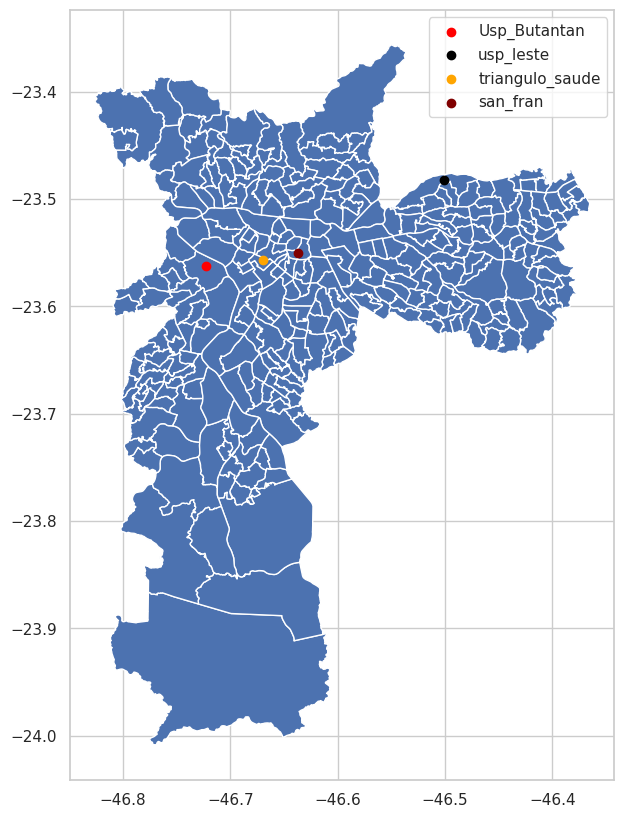

In [ ]:
#Utilizando o df_ponderation como base
ax = df_ponderation.plot(figsize=(15,10))

#colocando os pontos em cima do mapa que vem com df_ponderation
z[z['Localização']=='Usp_Butantan'].plot(ax=ax,color='red')
z[z['Localização']=='usp_leste'].plot(ax=ax,color='black')
z[z['Localização']=='triangulo_saude'].plot(ax=ax,color='orange')
z[z['Localização']=='san_fran'].plot(ax=ax,color='maroon')
plt.legend(['Usp_Butantan','usp_leste','triangulo_saude','san_fran']);

In [ ]:
#Usando a junção espacial para obter a informação de qual bairro esses espaços
#se encontram
df_neighborhood.sjoin(
      z,
      how="inner",
      predicate='intersects')[['Localização','neighborhood_name']]

,Localização,neighborhood_name
584,triangulo_saude,Cerqueira Cesar
916,san_fran,Se
1031,usp_leste,Jardim Keralux
1041,Usp_Butantan,Butanta
